In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transform


train_data=torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)


test_data=torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)



Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [16]:
import matplotlib.pyplot as plt
sample=next(iter(train_data))
image,lable=sample
#plt.imshow(image.squeeze())
print(image.shape)



torch.Size([3, 32, 32])


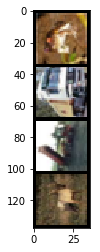

In [15]:
import numpy as np
test_loader=torch.utils.data.DataLoader(train_data,batch_size=4)
train_loader=torch.utils.data.DataLoader(test_data,batch_size=4)


batch=next(iter(test_loader))
images,labels=batch
grid=torchvision.utils.make_grid(images,nrow=5)
plt.imshow(np.transpose(grid))


In [18]:

class network(nn.Module):
    def __init__(self):
        super(network,self).__init__()
        self.conv1=torch.nn.Conv2d(3,6,5)
        self.conv2=torch.nn.Conv2d(6,16,5)
        self.pool=torch.nn.MaxPool2d(2,stride=2)
        self.fc1=torch.nn.Linear(16*5*5,120)
        self.fc2=torch.nn.Linear(120,84)
        self.fc3=torch.nn.Linear(84,10)
        
        
    def forward(self,x):
        t=self.conv1(x)
        t=F.relu(t)
        t=F.max_pool2d(t,2,2)
        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,2,2)
        t=t.reshape(-1,16*5*5)
        t=self.fc1(t)
        t=F.relu(t)
        t=self.fc2(t)
        t=F.relu(t)
        t = torch.log_softmax(self.fc3(t), dim=1)    # NLLLoss() 
        return t
        
        
        

In [20]:
model=network()
print(model)

network(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## training gradient

In [29]:

optim=torch.optim.SGD(model.parameters(),lr=0.001)
torch.set_grad_enabled(True)

for ep in range(3):
    total_loss=0
    for batch, (x, y) in enumerate(train_loader):
        y_pred=model(x)
        loss=F.cross_entropy(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        total_loss+=loss.item()
        if batch%100==0:
            print(f"loss {total_loss:>7f},batch {batch*len(images)}")
    print(total_loss)

loss 2.317543,batch 0
loss 232.399119,batch 400
loss 462.464248,batch 800
loss 692.607054,batch 1200
loss 922.770098,batch 1600
loss 1152.798856,batch 2000
loss 1382.642111,batch 2400
loss 1612.590524,batch 2800
loss 1842.635410,batch 3200
loss 2072.530969,batch 3600
loss 2302.493472,batch 4000
loss 2532.431180,batch 4400
loss 2762.509025,batch 4800
loss 2992.389685,batch 5200
loss 3222.219953,batch 5600
loss 3452.069724,batch 6000
loss 3681.866255,batch 6400
loss 3911.729890,batch 6800
loss 4141.480750,batch 7200
loss 4371.494120,batch 7600
loss 4601.201700,batch 8000
loss 4831.378952,batch 8400
loss 5061.435243,batch 8800
loss 5291.135092,batch 9200
loss 5520.892524,batch 9600
5748.222904920578
loss 2.284354,batch 0
loss 231.860030,batch 400
loss 461.711259,batch 800
loss 691.415220,batch 1200
loss 921.514166,batch 1600
loss 1151.144218,batch 2000
loss 1380.586905,batch 2400
loss 1610.204710,batch 2800
loss 1839.811785,batch 3200
loss 2069.401513,batch 3600
loss 2299.061085,batch 400

In [31]:
testloss=0
correct=0
size = len(test_loader.dataset)
with torch.no_grad():
    for X, y in test_loader:
        ypred=model(x)
        testloss=testloss+F.cross_entropy(ypred,y).item()
        correct=correct+(ypred.argmax(1)==y).sum().item()
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%")
    print(f"loss {testloss:>7f},correct {correct}")

Test Error: 
 Accuracy: 10.1%
loss 28812.037271,correct 0.10072


In [36]:
def get_all_preds(model, laoder):
    all_pred=torch.tensor([])
    for batch in laoder:
        images,labels=batch
        preds=model(images)
        all_pred=torch.cat((all_pred,preds),dim=0)
    return all_pred

In [37]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_data, batch_size=4)
    train_preds = get_all_preds(model, prediction_loader)

In [38]:
torch.save(model.state_dict(), "model1.pth")
print("Saved PyTorch Model State to model1.pth")

model.load_state_dict(torch.load("model1.pth"))

Saved PyTorch Model State to model1.pth


<All keys matched successfully>